# **SA-FINBERT-LSTM**

## **Loading Twitter sentiments**

In [1]:
import pandas as pd

In [2]:
from google.colab import files
files.upload()

Saving EUcentralbank_finBert.csv to EUcentralbank_finBert.csv
Saving EUinflation_finBert.csv to EUinflation_finBert.csv
Saving EUinterestrate_finBert.csv to EUinterestrate_finBert.csv
Saving EUrecession_finBert.csv to EUrecession_finBert.csv
Saving EUtax_finBert.csv to EUtax_finBert.csv
Saving macroeconomic_finBert.csv to macroeconomic_finBert.csv
Saving USFed_finBert.csv to USFed_finBert.csv
Saving USinflation_finBert.csv to USinflation_finBert.csv
Saving USinterestrate_finBert.csv to USinterestrate_finBert.csv
Saving USrecession2_finBert.csv to USrecession2_finBert.csv
Saving UStax_finBert.csv to UStax_finBert.csv


In [ ]:
#tweet = pd.read_csv('USinflation_finBert.csv')

In [ ]:
# tweet1 = pd.read_csv('Tweet-5_finBert.csv')
# tweet2 = pd.read_csv('Tweet-4_finBert.csv')
# tweet3 = pd.read_csv('Tweet-3_finBert.csv')
# tweet4 = pd.read_csv('Tweet-2_finBert.csv')
# tweet5 = pd.read_csv('Tweet-1_finBert.csv')
# tweet6 = pd.read_csv('Tweet1_finBert.csv')
# tweet7 = pd.read_csv('Tweet2_finBert.csv')
# tweet8 = pd.read_csv('Tweet3_finBert.csv')
# tweet9 = pd.read_csv('Tweet4_finBert.csv')
# tweet10 = pd.read_csv('Tweet5_finBert.csv')

In [3]:
tweet1 = pd.read_csv('EUcentralbank_finBert.csv')
tweet2 = pd.read_csv('EUinflation_finBert.csv')
tweet3 = pd.read_csv('EUinterestrate_finBert.csv')
tweet4 = pd.read_csv('EUrecession_finBert.csv')
tweet5 = pd.read_csv('EUtax_finBert.csv')
tweet6 = pd.read_csv('macroeconomic_finBert.csv')
tweet7 = pd.read_csv('USFed_finBert.csv')
tweet8 = pd.read_csv('USinflation_finBert.csv')
tweet9 = pd.read_csv('USinterestrate_finBert.csv')
tweet10 = pd.read_csv('USrecession2_finBert.csv')
tweet11 = pd.read_csv('UStax_finBert.csv')

In [ ]:
# frames = [tweet1, tweet2, tweet3, tweet4, tweet5, tweet6, tweet7, tweet8, tweet9, tweet10]
# tweet=pd.concat(frames)

In [4]:
frames = [tweet1, tweet2, tweet3, tweet4, tweet5, tweet6, tweet7, tweet8, tweet9, tweet10, tweet11]
tweet=pd.concat(frames)

In [5]:
from datetime import datetime
tweet['Date'] = pd.to_datetime(tweet['Date'], errors='coerce')
tweet['Date'] = tweet['Date'].dt.strftime('%Y-%m-%d')

In [ ]:
#del tweet[tweet.columns[0]]

In [6]:
tweet

,Date,User,twee,sentiment
0,2013-12-16,Habus,eu central bank warns against the bitcoin comp...,neutral
1,2013-12-20,torvale1953,european central bank president mario draghi e...,neutral
2,2013-12-22,fortunepayment,the european central bank ecb has created the ...,neutral
3,2013-12-24,nipped,small panic attack by the turkish central bank...,neutral
4,2013-12-27,skydbelltreatti,details of eu iran sanctions covers oil compan...,neutral
...,...,...,...,...
30102,2022-11-10,thatwhatmatters,only when shri is coming to bengaluru shri ...,neutral
30103,2022-11-10,PhilipBritz3,psastrike the right to strike is a mature poli...,neutral
30104,2022-11-10,grahamh941,bit of a long shot but does anyone have any ex...,neutral
30105,2022-11-10,OsgoodeIFLS,does implementing canadadisabilitybenefit act ...,negative


In [7]:
tweet= tweet.sort_values(by=['Date'])

In [8]:
# Drop duplicated tweets
tweet.drop_duplicates(subset='twee',inplace=True)

In [9]:
tweet

,Date,User,twee,sentiment
0,2013-12-16,Habus,eu central bank warns against the bitcoin comp...,neutral
10,2013-12-16,Educ_Reform,is it a surprise that finance has not to date ...,neutral
9,2013-12-16,TotesFacts,the cost of college textbooks in the us has ri...,neutral
8,2013-12-16,mrymler,inb4 ala relax lah maryam the future will work...,neutral
7,2013-12-16,KeithMcCullough,newsflash deflating the inflation in 2014 prov...,neutral
...,...,...,...,...
152080,2022-11-10,LTSummer22,why cant my woke company give me a raise for i...,neutral
152079,2022-11-10,ajbell,big day for us inflation figures whsmith rest...,positive
152078,2022-11-10,wheeliedealer,stocks looking bit soggy but nothing dramatic ...,negative
152085,2022-11-10,alessiVT,media reports many people are anxious about in...,neutral


In [10]:
# Get the day of week column
tweet['weekday']= pd.to_datetime(tweet['Date']).dt.day_name(locale='en_US.utf8')

In [11]:
import datetime
DD = datetime.timedelta(days=1)
#filter for saturdays and Sunday date -1, -2 to become friday
#Saturdays
saturday = tweet['weekday'] == "Saturday"
tweet.loc[saturday,"Date"] = pd.to_datetime(tweet.loc[saturday,"Date"]).dt.date - DD

In [12]:
#Sundays
DD = datetime.timedelta(days=2)

sunday = tweet['weekday'] == "Sunday"
tweet.loc[sunday,"Date"] = pd.to_datetime(tweet.loc[sunday,"Date"]).dt.date - DD

In [13]:
#rename Date column
tweet.rename(columns = {'Date':'DateRelease'}, inplace = True)

In [14]:
tweet.loc[tweet['sentiment'] == 'neutral', 'sentiment'] = 0
tweet.loc[tweet['sentiment'] == 'positive', 'sentiment'] = 1
tweet.loc[tweet['sentiment'] == 'negative', 'sentiment'] = -1

In [15]:
tweet['sentiment'] = tweet['sentiment'].astype(float)

In [16]:
tweet

,DateRelease,User,twee,sentiment,weekday
0,2013-12-16,Habus,eu central bank warns against the bitcoin comp...,0.0,Monday
10,2013-12-16,Educ_Reform,is it a surprise that finance has not to date ...,0.0,Monday
9,2013-12-16,TotesFacts,the cost of college textbooks in the us has ri...,0.0,Monday
8,2013-12-16,mrymler,inb4 ala relax lah maryam the future will work...,0.0,Monday
7,2013-12-16,KeithMcCullough,newsflash deflating the inflation in 2014 prov...,0.0,Monday
...,...,...,...,...,...
152080,2022-11-10,LTSummer22,why cant my woke company give me a raise for i...,0.0,Thursday
152079,2022-11-10,ajbell,big day for us inflation figures whsmith rest...,1.0,Thursday
152078,2022-11-10,wheeliedealer,stocks looking bit soggy but nothing dramatic ...,-1.0,Thursday
152085,2022-11-10,alessiVT,media reports many people are anxious about in...,0.0,Thursday


In [17]:
tweet.drop(['User','twee', 'weekday'], axis = 1, inplace= True)

In [18]:
tweets= tweet.copy()

In [19]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356396 entries, 0 to 30106
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DateRelease  356396 non-null  object 
 1   sentiment    356396 non-null  float64
dtypes: float64(1), object(1)
memory usage: 8.2+ MB


In [20]:
#Change the column to datetime type before groupby 
tweets['DateRelease'] = pd.to_datetime(tweets['DateRelease'])

In [21]:
tweets= tweets.groupby('DateRelease').mean()

In [22]:
tweets= tweets.reset_index(drop=False)

In [23]:
tweets

,DateRelease,sentiment
0,2013-12-16,-0.014925
1,2013-12-17,-0.108911
2,2013-12-18,-0.006410
3,2013-12-19,0.068493
4,2013-12-20,-0.074380
...,...,...
2319,2022-11-04,-0.120438
2320,2022-11-07,-0.213805
2321,2022-11-08,-0.148820
2322,2022-11-09,-0.138081


### **Pos, Neg, Neu allocations**

In [ ]:
tweet= tweets.copy()

In [ ]:
tweet['sentiment'] = tweet['sentiment'].astype(str)

In [ ]:
positive = tweet[tweet['sentiment']>'0.000000']
print(str(positive.shape[0]/(tweets.shape[0])*100) + ' % of positive tweets')
pos=positive.shape[0]/tweets.shape[0]*100

22.203098106712567 % of positive tweets


In [ ]:
negative = tweet[tweet['sentiment']<'0.000000']
print(str(negative.shape[0]/(tweets.shape[0])*100) + ' % of negative tweets')
neg=negative.shape[0]/tweets.shape[0]*100

77.79690189328744 % of negative tweets


In [ ]:
neutral = tweet[tweet['sentiment']=='0.000000']
print(str(neutral.shape[0]/(tweets.shape[0])*100) + ' % of neutral tweets')
neu=neutral.shape[0]/tweets.shape[0]*100

0.0 % of neutral tweets


In [ ]:
explode= (0,0.1,0)
labels  = 'Positive', 'Negative', 'Neutral'
sizes=[pos, neg, neu]
colors = ['green', 'red', 'grey']

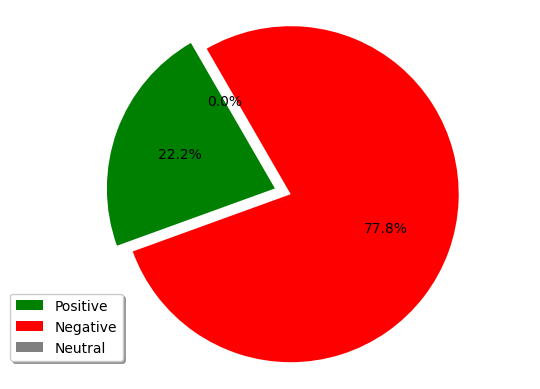

In [ ]:
import matplotlib.pyplot as plt
plt.pie(sizes, explode = explode, colors = colors, autopct= '%1.1f%%', startangle = 120)
plt.legend(labels, loc = (-0.05, 0.05), shadow = True)
plt.axis('equal')
plt.savefig('Sentiment_Analysis.png')

## **Loading EURUSD price**

In [24]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import numpy as np
import yfinance as yf

In [27]:
price = yf.download(tickers ='EURUSD=X', start= '2013-12-16', end= '2022-11-11')

[*********************100%***********************]  1 of 1 completed


In [28]:
price

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928,0
2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292,0
2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126,0
2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495,0
2013-12-20,1.365598,1.370870,1.362583,1.365579,1.365579,0
...,...,...,...,...,...,...
2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963,0
2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,0
2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,0


In [29]:
price.drop(['Volume'], inplace= True, axis = 1)

In [30]:
price = price.reset_index(drop=False)

In [31]:
price

,Date,Open,High,Low,Close,Adj Close
0,2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928
1,2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292
2,2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126
3,2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495
4,2013-12-20,1.365598,1.370870,1.362583,1.365579,1.365579
...,...,...,...,...,...,...
2316,2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963
2317,2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881
2318,2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863
2319,2022-11-09,1.008085,1.008878,1.001252,1.008085,1.008085


## **Merging 2 dataset**

In [32]:
price['Date']= pd.to_datetime(price['Date']) 
tweets['DateRelease']= pd.to_datetime(tweets['DateRelease']) 

In [33]:
df_final = pd.merge(price,tweets,how='left',left_on='Date',right_on='DateRelease')

In [ ]:
#df_final.drop(['index'], inplace= True, axis = 1)

In [34]:
df_final

,Date,Open,High,Low,Close,Adj Close,DateRelease,sentiment
0,2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928,2013-12-16,-0.014925
1,2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292,2013-12-17,-0.108911
2,2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126,2013-12-18,-0.006410
3,2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495,2013-12-19,0.068493
4,2013-12-20,1.365598,1.370870,1.362583,1.365579,1.365579,2013-12-20,-0.074380
...,...,...,...,...,...,...,...,...
2316,2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963,2022-11-04,-0.120438
2317,2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,2022-11-07,-0.213805
2318,2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,2022-11-08,-0.148820
2319,2022-11-09,1.008085,1.008878,1.001252,1.008085,1.008085,2022-11-09,-0.138081


In [ ]:
# df_final.loc[df_final['sentiment'] == 'neutral', 'sentiment'] = 2
# df_final.loc[df_final['sentiment'] == 'positive', 'sentiment'] = 3
# df_final.loc[df_final['sentiment'] == 'negative', 'sentiment'] = 1

In [ ]:
# df_final.drop(['User','twee','weekday','Date'], axis = 1, inplace= True)

In [ ]:
# df_final['sentiment'] = df_final['sentiment'].astype(float)

In [ ]:
# df_final=df_final.groupby('DateRelease').mean()

In [35]:
df_final.drop(['DateRelease'], axis=1, inplace= True)

In [36]:
df_final

,Date,Open,High,Low,Close,Adj Close,sentiment
0,2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928,-0.014925
1,2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292,-0.108911
2,2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126,-0.006410
3,2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495,0.068493
4,2013-12-20,1.365598,1.370870,1.362583,1.365579,1.365579,-0.074380
...,...,...,...,...,...,...,...
2316,2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963,-0.120438
2317,2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,-0.213805
2318,2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,-0.148820
2319,2022-11-09,1.008085,1.008878,1.001252,1.008085,1.008085,-0.138081


In [37]:
df_final['returns'] = (df_final['Adj Close']/df_final['Adj Close'].shift(1)) -1
df_final['returnsclass'] = [1 if df_final.returns[i]>0 else 0 for i in range(len(df_final))]

In [38]:
df_final.drop(['returns'], axis=1, inplace= True)

In [39]:
df_final = df_final.set_index(['Date'])
df_final

,Open,High,Low,Close,Adj Close,sentiment,returnsclass
Date,,,,,,,
2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928,-0.014925,0
2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292,-0.108911,1
2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126,-0.006410,1
2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495,0.068493,0
2013-12-20,1.365598,1.370870,1.362583,1.365579,1.365579,-0.074380,0
...,...,...,...,...,...,...,...
2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963,-0.120438,0
2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,-0.213805,1
2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,-0.148820,1


## **Data processing for LSTM**

In [40]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
df_scaled = sc.fit_transform(df_final)
print(df_scaled)
print(df_scaled[0].size)

[[0.95575293 0.95554347 0.96010293 ... 0.95580024 0.63909527 0.        ]
 [0.96120628 0.95163066 0.95755404 ... 0.96125319 0.50246434 1.        ]
 [0.96334911 0.95137574 0.95933491 ... 0.96317718 0.65147408 1.        ]
 ...
 [0.09747834 0.09815244 0.09969114 ... 0.09745652 0.44444622 1.        ]
 [0.11183391 0.09690325 0.10802951 ... 0.11180888 0.46005788 1.        ]
 [0.09768685 0.11870528 0.09093904 ... 0.09766498 0.40915703 0.        ]]
7


In [41]:
x = []
backcandles = 14
print(df_scaled.shape[0])
for j in range(6):#data_set_scaled[0].size):#2 columns are target not X
    x.append([])
    for i in range(backcandles, df_scaled.shape[0]):#backcandles+2
        x[j].append(df_scaled[i-backcandles:i, j])

2321


In [42]:
x=np.moveaxis(x, [0], [2])

In [43]:
x, yi =np.array(x), np.array(df_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
print(x)
print(x.shape)
print(y)
print(y.shape)

[[[0.95575293 0.95554347 0.96010293 0.95580024 0.95580024 0.63909527]
  [0.96120628 0.95163066 0.95755404 0.96125319 0.96125319 0.50246434]
  [0.96334911 0.95137574 0.95933491 0.96317718 0.96317718 0.65147408]
  ...
  [0.97181727 0.95867527 0.96537358 0.97212747 0.97212747 0.7167062 ]
  [0.9573214  0.9509233  0.96144159 0.9571071  0.9571071  0.54449339]
  [0.96216794 0.94991302 0.93598753 0.96212745 0.96212745 0.4930532 ]]

 [[0.96120628 0.95163066 0.95755404 0.96125319 0.96125319 0.50246434]
  [0.96334911 0.95137574 0.95933491 0.96317718 0.96317718 0.65147408]
  [0.94304367 0.93122927 0.94020116 0.94326461 0.94326461 0.76036449]
  ...
  [0.9573214  0.9509233  0.96144159 0.9571071  0.9571071  0.54449339]
  [0.96216794 0.94991302 0.93598753 0.96212745 0.96212745 0.4930532 ]
  [0.93916045 0.92637626 0.92889675 0.93903629 0.93903629 0.58810573]]

 [[0.96334911 0.95137574 0.95933491 0.96317718 0.96317718 0.65147408]
  [0.94304367 0.93122927 0.94020116 0.94326461 0.94326461 0.76036449]
  [0

In [44]:
splitlimit = int(len(x)*0.8)
print(splitlimit)
x_train, x_test = x[:splitlimit], x[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1845
(1845, 14, 6)
(462, 14, 6)
(1845, 1)
(462, 1)
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]]


## **Building LSTM model** 

In [45]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras.utils.vis_utils import plot_model

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
from sklearn.svm import LinearSVC
sns.set()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 14, 6)]           0         
                                                                 
 first_layer (LSTM)          (None, 150)               94200     
                                                                 
 dense_layer (Dense)         (None, 1)                 151       
                                                                 
 output (Activation)         (None, 1)                 0         
                                                                 
Total params: 94,351
Trainable params: 94,351
Non-trainable params: 0
_________________________________________________________________


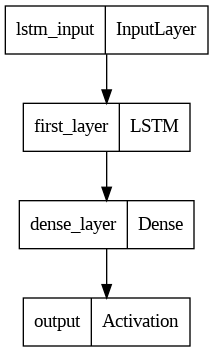

In [51]:
np.random.seed(50)

lstm_input = Input(shape=(backcandles, 6), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
#inputs = Dense(150, name='dense_layer1')(inputs)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('sigmoid', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
#model['Support Vector Machines'] = LinearSVC()
model.summary()
plot_model(model)

In [52]:
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='hinge', metrics=['accuracy'])
history= model.fit(x=x_train, y=y_train, batch_size=32, epochs=40, shuffle=False, validation_split = 0.15)

Epoch 1/40
49/49 [==============================] - 4s 38ms/step - loss: 1.0129 - accuracy: 0.5134 - val_loss: 0.9984 - val_accuracy: 0.4693
Epoch 2/40
49/49 [==============================] - 1s 27ms/step - loss: 1.0004 - accuracy: 0.5134 - val_loss: 1.0000 - val_accuracy: 0.4693
Epoch 3/40
49/49 [==============================] - 1s 26ms/step - loss: 1.0000 - accuracy: 0.5134 - val_loss: 1.0000 - val_accuracy: 0.4693
Epoch 4/40
49/49 [==============================] - 2s 34ms/step - loss: 1.0000 - accuracy: 0.5134 - val_loss: 1.0000 - val_accuracy: 0.4693
Epoch 5/40
49/49 [==============================] - 2s 47ms/step - loss: 1.0000 - accuracy: 0.5134 - val_loss: 1.0000 - val_accuracy: 0.4693
Epoch 6/40
49/49 [==============================] - 1s 26ms/step - loss: 1.0000 - accuracy: 0.5134 - val_loss: 1.0000 - val_accuracy: 0.4693
Epoch 7/40
49/49 [==============================] - 1s 26ms/step - loss: 1.0000 - accuracy: 0.5134 - val_loss: 1.0000 - val_accuracy: 0.4693
Epoch 8/40
49

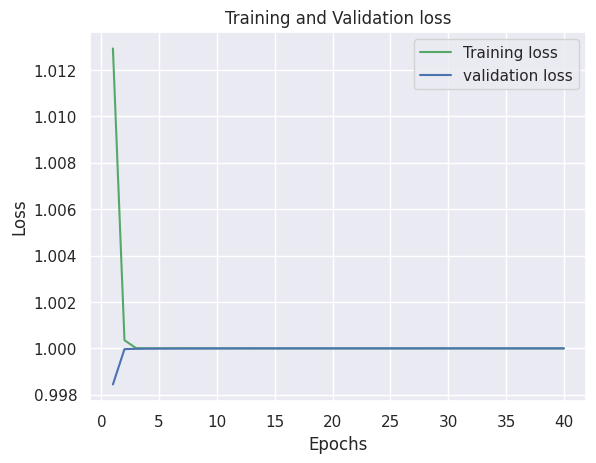

In [53]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,41)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

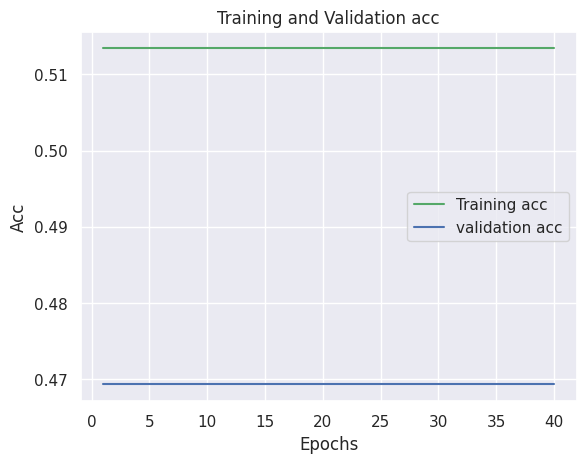

In [54]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,41)
plt.plot(epochs, acc_train, 'g', label='Training acc')
plt.plot(epochs, acc_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [55]:
y_pred = model.predict(x_test)
y_pred=np.where(y_pred > 0.50, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

15/15 [==============================] - 1s 9ms/step
[0] [0.]
[0] [1.]
[0] [0.]
[0] [1.]
[0] [1.]
[0] [1.]
[0] [1.]
[0] [1.]
[0] [0.]
[0] [1.]


In [56]:
print(classification_report(y_test, y_pred, digits=4))
print(confusion_matrix(y_test, y_pred))

MNB_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, y_pred)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

         0.0     0.5303    1.0000    0.6931       245
         1.0     0.0000    0.0000    0.0000       217

    accuracy                         0.5303       462
   macro avg     0.2652    0.5000    0.3465       462
weighted avg     0.2812    0.5303    0.3675       462

[[245   0]
 [217   0]]
Accuracy :  53.03  %
f1_score :  0.368


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(109.44999999999997, 0.5, 'Actual label')

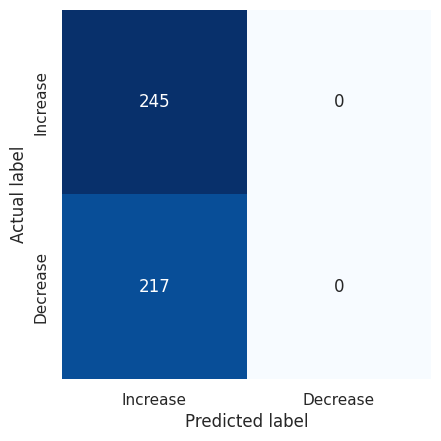

In [57]:
mat = confusion_matrix(y_test, y_pred)
labels = ['Increase', 'Decrease']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

# **TA for LSTM**

In [58]:
!pip install pandas-ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218921 sha256=53dec0596716a8f9c8253adeb6db741d6583ae97e8b6ad59782ab1feb2f95916
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers ='EURUSD=X', end= '2022-11-11')
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963,0
2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,0
2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,0
2022-11-09,1.008085,1.008878,1.001252,1.008085,1.008085,0
2022-11-10,1.001954,1.018299,0.993779,1.001954,1.001954,0


In [60]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['SMA']= ta.sma(data.Close, length=10)
data['EMA']= ta.ema(data.Close, length= 10)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)
macd = data.ta.macd(fast =12, slow =26, signal =9)
BB = data.ta.bbands(length=12, std =2)
ADX = data.ta.adx(length = 20)
ROC = data.ta.roc(length = 12)

dataTA = pd.concat([data, macd, BB, ADX, ROC], axis = 1)

In [61]:
dataTA['returns'] = (dataTA['Adj Close']/dataTA['Adj Close'].shift(1)) -1
dataTA['returnsclass'] = [1 if dataTA.returns[i]>0 else 0 for i in range(len(dataTA))]
dataTA.drop(['Volume'], axis=1, inplace=True)

In [62]:
dataTA.dropna(inplace=True)

In [63]:
data_set = dataTA.iloc[:, ]#.values
pd.set_option('display.max_columns', None)

data_set

,Open,High,Low,Close,Adj Close,RSI,SMA,EMA,EMAF,EMAM,EMAS,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_12_2.0,BBM_12_2.0,BBU_12_2.0,BBB_12_2.0,BBP_12_2.0,ADX_20,DMP_20,DMN_20,ROC_12,returns,returnsclass
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2004-06-25,1.217093,1.220301,1.211299,1.220301,1.220301,54.911255,1.211252,1.213470,1.212295,1.219270,1.228477,0.001650,0.000118,0.001532,1.198109,1.210410,1.222711,2.032554,0.902022,10.529251,19.865586,19.370648,1.328905,0.002380,1
2004-06-28,1.217493,1.222703,1.212797,1.218695,1.218695,53.966191,1.212501,1.214420,1.212905,1.219258,1.228347,0.001964,0.000346,0.001618,1.197928,1.211060,1.224191,2.168541,0.790725,10.197999,20.052943,18.542993,0.643457,-0.001316,0
2004-06-29,1.218695,1.219096,1.207496,1.209804,1.209804,48.968246,1.211821,1.213581,1.212610,1.219071,1.228101,0.001478,-0.000112,0.001590,1.199894,1.211751,1.223609,1.957117,0.417904,9.797026,19.049638,19.901794,0.690796,-0.007295,0
2004-06-30,1.209497,1.220301,1.206797,1.218398,1.218398,53.434557,1.213591,1.214457,1.213161,1.219058,1.227973,0.001766,0.000141,0.001625,1.200897,1.212768,1.224639,1.957702,0.737134,9.345300,18.464605,18.752050,1.011273,0.007103,1
2004-07-01,1.218294,1.220807,1.213902,1.216205,1.216205,52.185715,1.214872,1.214775,1.213451,1.219001,1.227817,0.001797,0.000138,0.001660,1.200904,1.212734,1.224565,1.950986,0.646672,8.885485,18.128930,18.186492,-0.032835,-0.001800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963,43.011123,0.990533,0.986115,0.985942,1.007830,1.025200,-0.000073,-0.000374,0.000301,0.969172,0.988323,1.007473,3.875445,0.151205,10.588025,18.945042,19.588859,-1.158250,-0.006600,0
2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,53.118878,0.991220,0.987345,0.986603,1.007534,1.024771,0.000468,0.000133,0.000335,0.971761,0.989675,1.007590,3.620319,0.589474,10.311693,19.627748,17.736596,1.662092,0.018378,1
2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,57.196524,0.992542,0.989985,0.988056,1.007421,1.024468,0.001603,0.001014,0.000588,0.974118,0.991673,1.009228,3.540559,0.790236,10.453165,21.704507,16.662629,2.451556,0.009047,1


In [64]:
data_set_count = data_set[['Close','returnsclass']].copy()
data_set_count = data_set_count.groupby('returnsclass').count()
data_set_count =data_set_count.rename(columns={'Close':'Count'})
data_set_count

,Count
returnsclass,
0,2394
1,2372


In [65]:
data_set=data_set.drop(data_set.index[0:2445])
data_set

,Open,High,Low,Close,Adj Close,RSI,SMA,EMA,EMAF,EMAM,EMAS,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_12_2.0,BBM_12_2.0,BBU_12_2.0,BBB_12_2.0,BBP_12_2.0,ADX_20,DMP_20,DMN_20,ROC_12,returns,returnsclass
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928,61.180787,1.368764,1.369946,1.364524,1.347592,1.339880,0.005894,0.002006,0.003889,1.350766,1.367213,1.383660,2.405920,0.704164,15.357994,22.396920,14.854837,1.220049,-0.000838,0
2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292,62.811095,1.370973,1.371100,1.365645,1.348160,1.340363,0.006076,0.001750,0.004326,1.351940,1.368537,1.385135,2.425581,0.733614,15.493713,21.662505,15.031101,1.168472,0.001720,1
2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126,63.392301,1.372779,1.372196,1.366738,1.348734,1.340849,0.006216,0.001512,0.004704,1.354059,1.370088,1.386118,2.339867,0.719524,15.622646,21.053065,14.608225,1.370242,0.000606,1
2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495,54.028961,1.373764,1.371523,1.366905,1.349125,1.341216,0.005567,0.000690,0.004877,1.358317,1.371279,1.384242,1.890574,0.392590,14.973438,19.547899,18.542880,1.055106,-0.006268,0
2013-12-20,1.365598,1.370870,1.362583,1.365579,1.365579,51.287513,1.373623,1.370442,1.366779,1.349451,1.341538,0.004762,-0.000092,0.004854,1.360510,1.371822,1.383133,1.649117,0.224048,14.297832,18.583230,19.134403,0.479314,-0.002130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963,43.011123,0.990533,0.986115,0.985942,1.007830,1.025200,-0.000073,-0.000374,0.000301,0.969172,0.988323,1.007473,3.875445,0.151205,10.588025,18.945042,19.588859,-1.158250,-0.006600,0
2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,53.118878,0.991220,0.987345,0.986603,1.007534,1.024771,0.000468,0.000133,0.000335,0.971761,0.989675,1.007590,3.620319,0.589474,10.311693,19.627748,17.736596,1.662092,0.018378,1
2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,57.196524,0.992542,0.989985,0.988056,1.007421,1.024468,0.001603,0.001014,0.000588,0.974118,0.991673,1.009228,3.540559,0.790236,10.453165,21.704507,16.662629,2.451556,0.009047,1


In [66]:
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)
print(data_set_scaled[0].size)

[[0.95575293 0.95554347 0.96010293 ... 0.65249573 0.47806662 0.        ]
 [0.96120628 0.95163066 0.95755404 ... 0.64874876 0.5235121  1.        ]
 [0.96334911 0.95137574 0.95933491 ... 0.66340681 0.50371678 1.        ]
 ...
 [0.09747834 0.09815244 0.09969114 ... 0.74196134 0.65365144 1.        ]
 [0.11183391 0.09690325 0.10802951 ... 0.7265157  0.60325611 1.        ]
 [0.09768685 0.11870528 0.09093904 ... 0.66161841 0.38492282 0.        ]]
25


In [67]:
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 14
print(data_set_scaled.shape[0])
for j in range(23):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

2321


In [68]:
X=np.moveaxis(X, [0], [2])

In [69]:
X, Yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
Y=np.reshape(Yi,(len(Yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(Y)
print(Y.shape)

[[[0.95575293 0.95554347 0.96010293 ... 0.54253366 0.29084473 0.65249573]
  [0.96120628 0.95163066 0.95755404 ... 0.51841105 0.29642531 0.64874876]
  [0.96334911 0.95137574 0.95933491 ... 0.49839338 0.28303693 0.66340681]
  ...
  [0.97181727 0.95867527 0.96537358 ... 0.58146359 0.270451   0.59516472]
  [0.9573214  0.9509233  0.96144159 ... 0.550674   0.28532339 0.56685782]
  [0.96216794 0.94991302 0.93598753 ... 0.48930339 0.45176878 0.56586288]]

 [[0.96120628 0.95163066 0.95755404 ... 0.51841105 0.29642531 0.64874876]
  [0.96334911 0.95137574 0.95933491 ... 0.49839338 0.28303693 0.66340681]
  [0.94304367 0.93122927 0.94020116 ... 0.4489547  0.4076092  0.64051303]
  ...
  [0.9573214  0.9509233  0.96144159 ... 0.550674   0.28532339 0.56685782]
  [0.96216794 0.94991302 0.93598753 ... 0.48930339 0.45176878 0.56586288]
  [0.93916045 0.92637626 0.92889675 ... 0.42673069 0.44843591 0.50866035]]

 [[0.96334911 0.95137574 0.95933491 ... 0.49839338 0.28303693 0.66340681]
  [0.94304367 0.931229

In [70]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
Y_train, Y_test = Y[:splitlimit], Y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_train)

1845
(1845, 14, 23)
(462, 14, 23)
(1845, 1)
(462, 1)
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]]


# **Building 2 LSTMs for TA and SA-FinBert**

In [72]:
from tensorflow.keras import regularizers

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 model_input1 (InputLayer)      [(None, 14, 23)]     0           []                               
                                                                                                  
 model_input2 (InputLayer)      [(None, 14, 6)]      0           []                               
                                                                                                  
 model_LSTM_layer1 (LSTM)       (None, 150)          104400      ['model_input1[0][0]']           
                                                                                                  
 model_LSTM_layer2 (LSTM)       (None, 150)          94200       ['model_input2[0][0]']           
                                                                                            

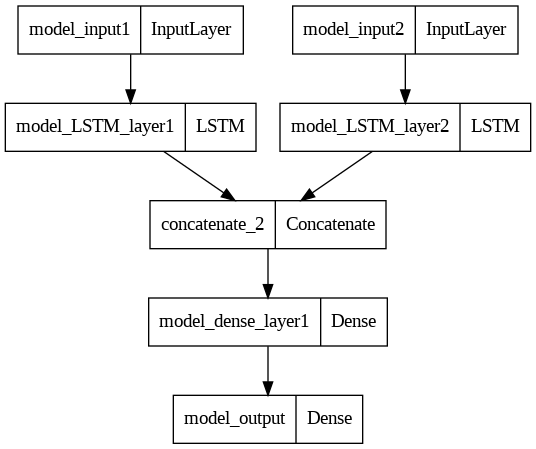

In [74]:
np.random.seed(50)
#LSTM Model 1 for Technical Analysis 
input1 = Input(shape=(backcandles, 23), name='model_input1')
model_inputs1 = LSTM(150, name='model_LSTM_layer1')(input1)

#LSTM Model 2 for Sentiment Analysis
input2 = Input(shape=(backcandles, 6), name='model_input2')
model_inputs2 = LSTM(150, name='model_LSTM_layer2')(input2)

#Concatenating 2 LSTM outputs
model_inputs = concatenate([model_inputs1 ,model_inputs2], axis=1)

# model_inputs1 = Dense(64, name='model_flatten_layer1')(model_inputs1)
#model_inputs2 = Dense(64, name='model_flatten_layer2')(model_inputs2)

model_inputs = Dense(150, activation='relu', name='model_dense_layer1')(model_inputs)
#model_inputs = Dense(75, activation='relu', name='model_dense_layer2')(model_inputs)
#model_inputs = Dense(1, name='model_dense_layer')(model_inputs)

model_output = Dense(1, activation='linear', kernel_regularizer=regularizers.l2(1e-4), name='model_output')(model_inputs)
modelc = Model(inputs=[input1,input2], outputs=model_output)
modelc.summary()
plot_model(modelc)

In [ ]:
from numpy.lib.twodim_base import histogram2d
adam = optimizers.Adam()
modelc.compile(optimizer=adam, loss='mse')
hist= modelc.fit(x=[X_train,x_train], y=[Y_train, y_train], batch_size=32, epochs=40, shuffle=False, validation_split = 0.15)

Epoch 1/40
49/49 [==============================] - 5s 54ms/step - loss: 0.2530 - val_loss: 0.2496
Epoch 2/40
49/49 [==============================] - 2s 35ms/step - loss: 0.2509 - val_loss: 0.2491
Epoch 3/40
49/49 [==============================] - 2s 36ms/step - loss: 0.2502 - val_loss: 0.2491
Epoch 4/40
49/49 [==============================] - 3s 67ms/step - loss: 0.2505 - val_loss: 0.2492
Epoch 5/40
49/49 [==============================] - 2s 36ms/step - loss: 0.2502 - val_loss: 0.2487
Epoch 6/40
49/49 [==============================] - 2s 36ms/step - loss: 0.2500 - val_loss: 0.2490
Epoch 7/40
49/49 [==============================] - 2s 36ms/step - loss: 0.2500 - val_loss: 0.2487
Epoch 8/40
49/49 [==============================] - 2s 36ms/step - loss: 0.2499 - val_loss: 0.2487
Epoch 9/40
49/49 [==============================] - 2s 35ms/step - loss: 0.2499 - val_loss: 0.2489
Epoch 10/40
49/49 [==============================] - 2s 48ms/step - loss: 0.2495 - val_loss: 0.2487
Epoch 11/

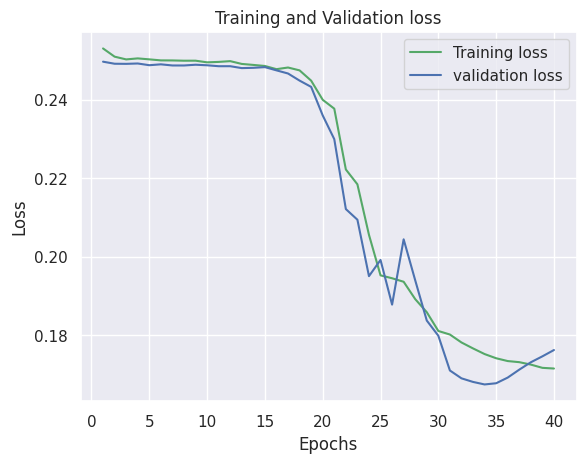

In [ ]:
l_train = hist.history['loss']
l_val = hist.history['val_loss']
epochs = range(1,41)
plt.plot(epochs, l_train, 'g', label='Training loss')
plt.plot(epochs, l_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_predict = modelc.predict([X_test, x_test])
y_predict=np.where(y_predict > 0.50, 1,0)
for i in range(10):
    print(y_predict[i], y_test[i])

15/15 [==============================] - 1s 14ms/step
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [1.]
[1] [1.]
[0] [1.]
[0] [1.]
[0] [0.]
[0] [1.]


In [ ]:
print(classification_report(y_test, y_predict, digits=4))
print(confusion_matrix(y_test, y_predict))

MNB_f1 = round(f1_score(y_test, y_predict, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, y_predict)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

         0.0     0.7479    0.7265    0.7371       245
         1.0     0.7009    0.7235    0.7120       217

    accuracy                         0.7251       462
   macro avg     0.7244    0.7250    0.7245       462
weighted avg     0.7258    0.7251    0.7253       462

[[178  67]
 [ 60 157]]
Accuracy :  72.51  %
f1_score :  0.725
